<h2>Simulation and analysis of the card game "No Thanks"</h2>

Import game simulator code from Table.py. Also import numpy for data analysis and matpltlib for plots.

In [1]:
%matplotlib inline

from table import Table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from statistics import mean, median_low

Select the number of players and the number of games to simulate.

In [2]:
num_players = 3
num_games = 10000

Run the simulation and collect the data.

In [3]:
game_data = []
for i in range(num_games):
    mytable = Table(num_ai_players=num_players, verbose=0)
    mytable.play()
    game_data.append(mytable.score())

The output of Table.score() is a list of lists containing the following data for each player in the game:

<table>
   <tr>
      <td>Index</td> <td>Description</td>
   </tr>
   <tr>
      <td><div align="center">0</div></td> <td>Lost = 0<br>Won = 1<br>Tied = 2</td>
   </tr>
   <tr>
      <td><div align="center">1</div></td> <td>Final score (int)</td>
   </tr>
   <tr>
      <td><div align="center">2</div></td> <td>Player position, indexed from 0 (i.e. the player who went first has position 0)</td>
   </tr>
   <tr>
      <td><div align="center">3</div></td> <td>Initial threshold (int)</td>
   </tr>
   <tr>
      <td><div align="center">4</div></td> <td>Token threshold (int)</td>
   </tr>
   <tr>
      <td><div align="center">5</div></td> <td>Effective value threshold (int)</td>
   </tr>
   <tr>
      <td><div align="center">6</div></td> <td>Pot threshold (int)</td>
   </tr>
   <tr>
      <td><div align="center">7</div></td> <td>Token history (list of ints)</td>
   </tr>
   <tr>
      <td><div align="center">8</div></td> <td>Effective value history (list of ints)</td>
   </tr>
   <tr>
       <td><div align="center">9</div></td> <td>Player's cards, in the order in which they were obtained (list of ints)</td>
   </tr>
</table>

Remove (pop) the list of cards from every player's data, separating them into a list of winning hands and a list of losing hands.

In [4]:
winning_cards = []
losing_cards = []
for game in game_data:
    for player_data in game:
        if player_data[0] > 0:
            winning_cards.append(player_data.pop())
        else:
            losing_cards.append(player_data.pop())
num_win = len(winning_cards)
num_lose = len(losing_cards)

Do winning players tend to take more or fewer cards than losing players?

Average number of cards in winning hands: 7.588484251968504 
Average number of cards in losing hands: 8.210735887096774 

Median number of cards in winning hands: 7 
Median number of cards in losing hands: 8


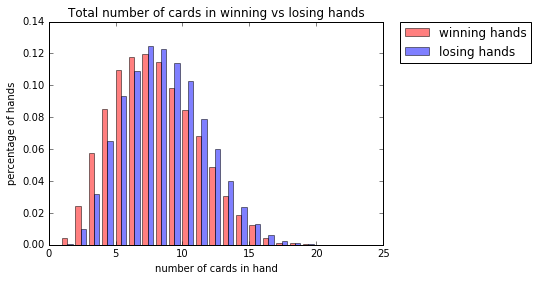

In [5]:
win_len = []
lose_len = []
for hand in winning_cards:
    win_len.append(len(hand))
for hand in losing_cards:
    lose_len.append(len(hand))
print("Average number of cards in winning hands:", mean(win_len), \
      "\nAverage number of cards in losing hands:", mean(lose_len), \
      "\n\nMedian number of cards in winning hands:", median_low(win_len), \
      "\nMedian number of cards in losing hands:", median_low(lose_len))
win_len_ctr = Counter()
lose_len_ctr = Counter()
for ct in win_len:
    win_len_ctr[ct] += 1
for ct in lose_len:
    lose_len_ctr[ct] += 1
win_labels, win_values = zip(*win_len_ctr.items())
lose_labels, lose_values = zip(*lose_len_ctr.items())
bar_width = 0.4
opacity = 0.5
win_len_plt = plt.bar(win_labels, [value / num_win for value in win_values], bar_width, alpha=opacity, color='r', \
                     label='winning hands')
lose_len_plt = plt.bar([label + bar_width for label in lose_labels], [value / num_lose for value in lose_values], \
                      bar_width, alpha=opacity, color='b', label='losing hands')
plt.xlabel('number of cards in hand')
plt.ylabel('percentage of hands')
plt.title('Total number of cards in winning vs losing hands')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<em>In 10,000 three-player games, I find that winning players end up with slightly fewer cards than losing players (avg 7.6 vs. 8.2, median 7 vs 8).</em>

Visualize the distribution of cards in winning and losing final hands: calculate and plot the percent of hands that contain each card (3-35).

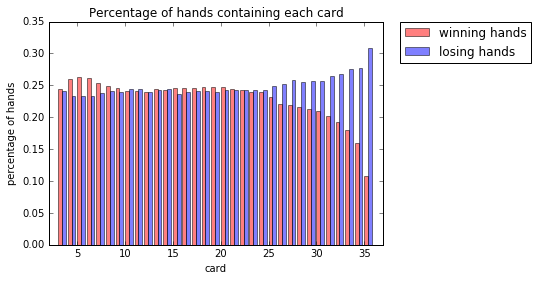

In [6]:
card_counts_win = Counter()
card_counts_lose = Counter()
for hand in winning_cards:
    for card in hand:
        card_counts_win[card] += 1
for hand in losing_cards:
    for card in hand:
        card_counts_lose[card] += 1
win_labels, win_values = zip(*card_counts_win.items())
lose_labels, lose_values = zip(*card_counts_lose.items())
bar_width = 0.4
opacity = 0.5
win_plt = plt.bar(win_labels, [value / num_win for value in win_values], bar_width, alpha=opacity, color='r', \
                  label='winning hands')
lose_plt = plt.bar([label + bar_width for label in lose_labels], [value / num_lose for value in lose_values], \
                   bar_width, alpha=opacity, color='b', label='losing hands')
plt.xlabel('card')
plt.ylabel('percentage of hands')
plt.title('Percentage of hands containing each card')
plt.xlim((2,37))
#plt.xticks([label + bar_width for label in lose_labels], lose_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<em>The difference between winning and losing hands is striking for card values greater than ~26. Winning hands are much less likely to contain high-valued cards. The percentage of winning hands containing the 35 is less than a third of the percentage of losing hands containing the 35.</em>

Create a Numpy array and a Pandas data frame of player attributes.

In [7]:
slice = []
for game in game_data:
    for player in game:
        slice.append(player[:7])
attributes = np.array(slice)
df = pd.DataFrame(data=attributes, \
                  columns=['won', 'score', 'pos', 'init_thr', 'tok_thr', 'eff_val_thr', 'pot_thr'])

Descibe attributes of winners (including ties).

In [8]:
df[df['won'] > 0].describe()

,won,score,pos,init_thr,tok_thr,eff_val_thr,pot_thr
count,10160.000000,10160.000000,10160.000000,10160.000000,10160.000000,10160.000000,10160.000000
mean,1.031496,32.005709,1.020472,17.749705,4.244390,4.403839,12.918799
std,0.174663,14.865939,0.814026,9.089316,2.571398,2.571357,4.270783
min,1.000000,-19.000000,0.000000,3.000000,0.000000,0.000000,6.000000
25%,1.000000,22.000000,0.000000,10.000000,2.000000,2.000000,9.000000
50%,1.000000,32.000000,1.000000,17.000000,4.000000,5.000000,13.000000
75%,1.000000,42.000000,2.000000,25.000000,7.000000,7.000000,17.000000
max,2.000000,90.000000,2.000000,34.000000,8.000000,8.000000,20.000000


Describe attributes of losers.

In [9]:
df[df['won'] == 0].describe()

,won,score,pos,init_thr,tok_thr,eff_val_thr,pot_thr
count,19840,19840.000000,19840.000000,19840.000000,19840.000000,19840.000000,19840.000000
mean,0,71.430897,0.989516,18.866280,3.896673,3.759677,13.033921
std,0,27.101054,0.817601,9.324042,2.577946,2.543201,4.383870
min,0,5.000000,0.000000,3.000000,0.000000,0.000000,6.000000
25%,0,52.000000,0.000000,11.000000,2.000000,2.000000,9.000000
50%,0,66.000000,1.000000,19.000000,4.000000,4.000000,13.000000
75%,0,85.000000,2.000000,27.000000,6.000000,6.000000,17.000000
max,0,197.000000,2.000000,34.000000,8.000000,8.000000,20.000000


<em>At a glance, there is not a huge difference between the position or threshold values of winning and losing players. These values were assigned randomly from uniform distributions. It would be noteworthy if the distribution of any of these values were no longer uniform when viewing the winning and losing thresholds separately. This would indicate that some particular values confer an advantage (are associated with winning) while others confer a disadvantage (are associated with losing).</em> 

Does player position confer an advantage?

In [10]:
won_pos = df[df['won'] > 0]['pos'].value_counts(sort=False).to_frame()
won_pos.columns = ['count']
won_pos['percent'] = 100 * won_pos['count'] / won_pos['count'].sum()
won_pos

,count,percent
0,3264,32.125984
1,3424,33.700787
2,3472,34.173228


In [11]:
lose_pos = df[df['won'] == 0]['pos'].value_counts(sort=False).to_frame()
lose_pos.columns = ['count']
lose_pos['percent'] = 100 * lose_pos['count'] / lose_pos['count'].sum()
lose_pos

,count,percent
0,6736,33.951613
1,6576,33.145161
2,6528,32.903226


<em>Player positions are quite evenly distributed; they do not differ significantly from a uniform distribution. Position does not appear to confer any significant advantage.</em>

Investigate initial value threshold distribution.

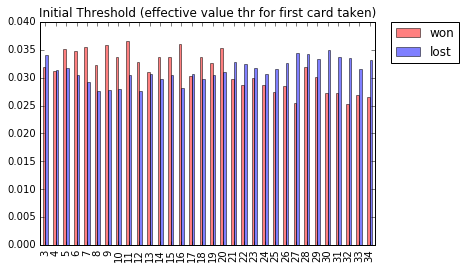

In [48]:
inval = pd.DataFrame()
inval['won'] = df[df['won'] > 0]['init_thr'].value_counts(sort=False) / num_win
inval['lost'] = df[df['won'] == 0]['init_thr'].value_counts() / num_lose
ax = inval.sort_index().plot.bar(title='Initial Threshold (effective value thr for first card taken)', \
                                 legend=False, color=['r', 'b'], alpha=opacity)
leg = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Investigate token threshold distribution.

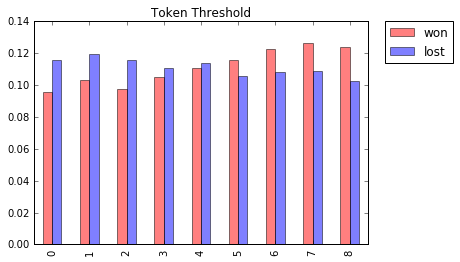

In [47]:
tok = pd.DataFrame()
tok['won'] = df[df['won'] > 0]['tok_thr'].value_counts(sort=False) / num_win
tok['lost'] = df[df['won'] == 0]['tok_thr'].value_counts() / num_lose
ax = tok.sort_index().plot.bar(title='Token Threshold', legend=False, color=['r', 'b'], alpha=opacity)
leg = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Investigate effective value threshold distribution.

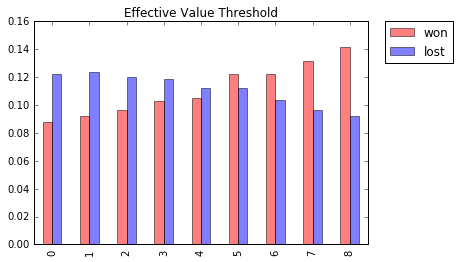

In [46]:
efv = pd.DataFrame()
efv['won'] = df[df['won'] > 0]['eff_val_thr'].value_counts(sort=False) / num_win
efv['lost'] = df[df['won'] == 0]['eff_val_thr'].value_counts() / num_lose
ax = efv.sort_index().plot.bar(title='Effective Value Threshold', legend=False, color=['r', 'b'], alpha=opacity)
leg = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Investigate pot threshold distribution.

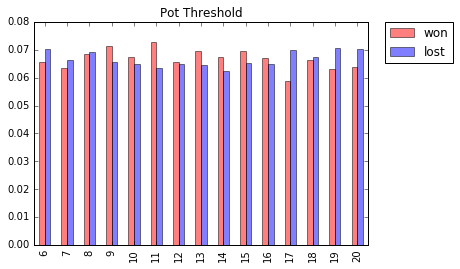

In [49]:
pot = pd.DataFrame()
pot['won'] = df[df['won'] > 0]['pot_thr'].value_counts(sort=False) / num_win
pot['lost'] = df[df['won'] == 0]['pot_thr'].value_counts() / num_lose
ax = pot.sort_index().plot.bar(title='Pot Threshold', legend=False, color=['r', 'b'], alpha=opacity)
leg = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Try a linear regression to fit threshold values to the final score.

In [68]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
random_state = 110
X_train, X_test, y_train, y_test = train_test_split(attributes[:,3:], attributes[:,1], \
                                                    test_size=0.2, random_state=random_state)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
prediction = regr.predict(X_test)
print('Coefficients:', regr.coef_, \
      '\nResidual sum of squares:', np.mean((prediction - y_test) ** 2), \
      '\nVariance score:', regr.score(X_test, y_test))

Coefficients: [ 0.22413259 -0.95017634 -1.47324798  0.34799373] 
Residual sum of squares: 842.459517101 
Variance score: 0.0325044052146


<em>That's a very poor fit! A variance score of 1 means the linear model describes the data perfectly; a variance score of 0.03 means that the player attributes account for only ~3% of the final outcome of the game, according to the linear model.</em>

In [96]:
# Define a successful prediction as being within "tolerance" units of the actual score.
tolerances = [5, 10, 15, 20, 25, 30]
print("{0:9} {1:9}".format('tolerance', 'correct'))
for tolerance in tolerances:
    acc = abs(prediction - y_test)
    print("{0:5d}     {1:5.2f} %".format(tolerance, 100 * (acc <= tolerance).sum() / len(acc)))

tolerance correct  
    5     14.42 %
   10     28.78 %
   15     42.38 %
   20     53.85 %
   25     64.08 %
   30     72.47 %
